## The continuation with pre-learned model

## Generator and Grayscale images

At a very beginning the model was prelearned in 20 epochs with accuracy 68.03%. 
It's testing again with next 20 epochs.
And also with the next 20 epochs (total 60 epochs)

#### Results:
* 20 epochs: 68.03%
* 40 epochs: 78.21%
* 60 epochs: 81.59%

Each image 106x79x1

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2399249376019879838, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 356122624
 locality {
   bus_id: 1
 }
 incarnation: 3647465385771688252
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"]

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
width, height = 106, 79
train_data_dir = '../gen_x3_3/train'
test_data_dir = '../gen_x3_3/test'
nb_train_samples = 47232
nb_test_samples = 11808
epochs = 20
batch_size = 512

input_shape = (width, height, 1)

In [4]:
model = load_model("simple_106x79/simple_NN_106x79-20-0.7956.h5")

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
# summarize model and apply checkpoints
print(model.summary())
filepath = 'simple_106x79/simple_NN_106x79_continue-{epoch:02d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 37, 32)        1760      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 14, 64)        71744     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 4, 256)         327936    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.20,
    zoom_range=0.15,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

Found 47232 images belonging to 6 classes.
Found 11808 images belonging to 6 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/20
92/92 [==============================] - 65s 705ms/step - loss: 0.7751 - acc: 0.6767 - val_loss: 0.7065 - val_acc: 0.6999
Epoch 2/20
92/92 [==============================] - 51s 551ms/step - loss: 0.7730 - acc: 0.6782 - val_loss: 0.7284 - val_acc: 0.6979
Epoch 3/20
92/92 [==============================] - 50s 546ms/step - loss: 0.7374 - acc: 0.6952 - val_loss: 0.6719 - val_acc: 0.7205
Epoch 4/20
92/92 [==============================] - 50s 541ms/step - loss: 0.7194 - acc: 0.7021 - val_loss: 0.6736 - val_acc: 0.7206
Epoch 5/20
92/92 [==============================] - 50s 541ms/step - loss: 0.7136 - acc: 0.7085 - val_loss: 0.6764 - val_acc: 0.7225
Epoch 6/20
92/92 [==============================] - 50s 540ms/step - loss: 0.7079 - acc: 0.7081 - val_loss: 0.6973 - val_acc: 0.7144
Epoch 7/20
92/92 [==============================] - 50s 547ms/step - loss: 0.6812 - acc: 0.7205 - val_loss: 0.6471 - val_acc: 0.7308
Epoch 8/20
92/92 [==============================] - 50s 541ms/step - 

In [9]:
score = model.evaluate_generator(test_generator)
print("Accuracy: %.2f%%" % (score[1]*100))
print('Test loss:', score[0])
print('Test accuracy', score[1])

Accuracy: 78.21%
Test loss: 0.546640502081977
Test accuracy 0.7820968834688347


In [10]:
model_json = model.to_json()
with open('simple_106x79/simple_NN_106x79_model.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('simple_106x79/simple_NN_106x79_continue_weights.h5')
print('Saved model weights')

Saved model weights


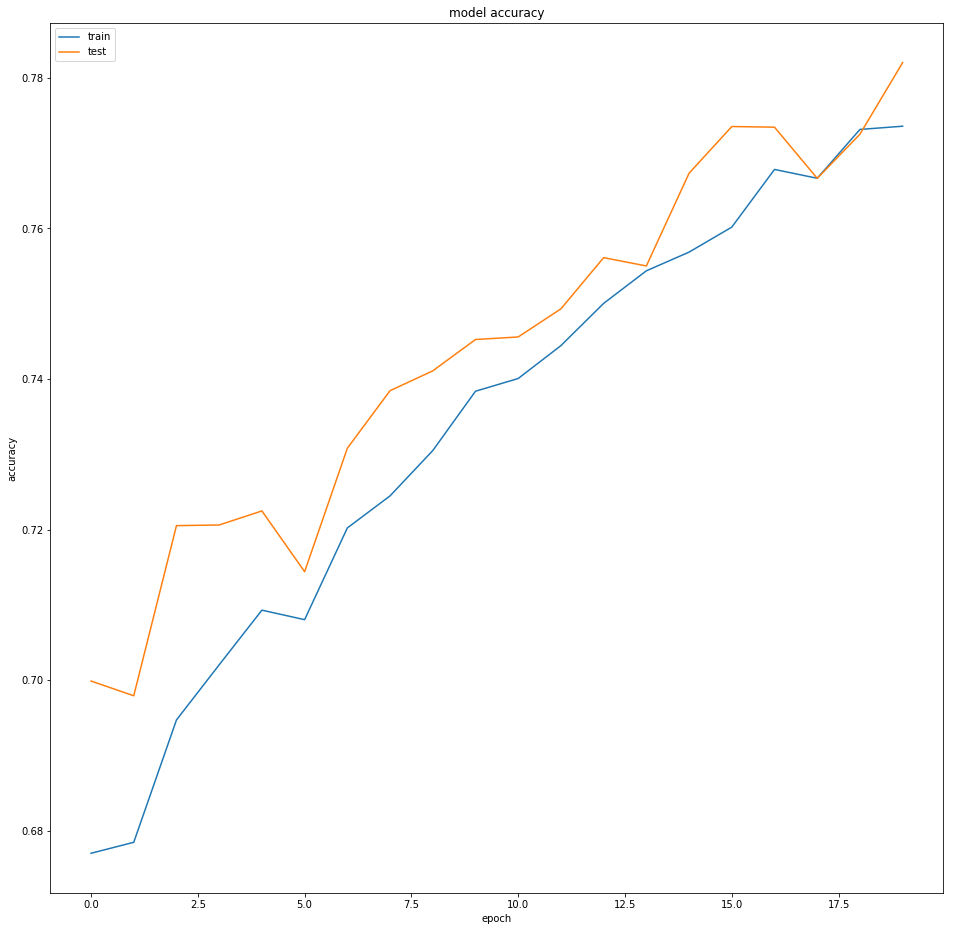

In [13]:
#summarize for accuracy
fig = plt.figure(figsize=(16,16))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

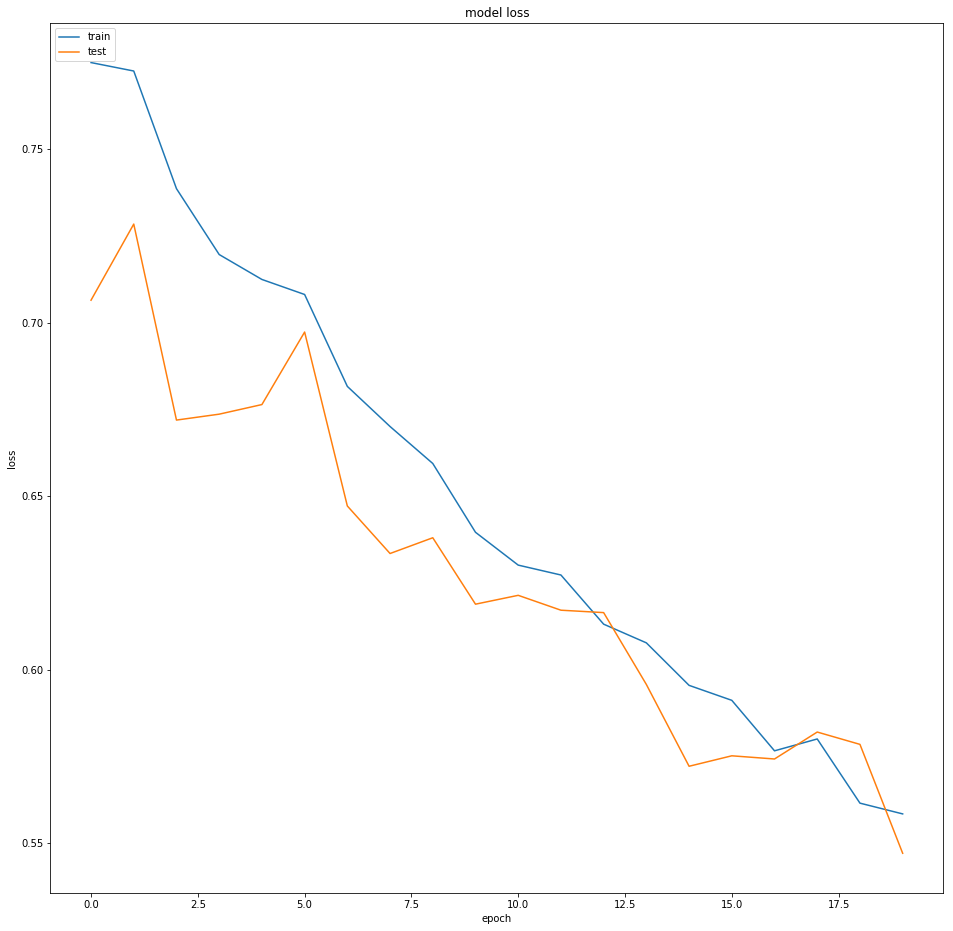

In [14]:
#summarize for loss
fig = plt.figure(figsize=(16,16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
filepath = 'simple_106x79/simple_NN_106x79_continue2-{epoch:02d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/20
92/92 [==============================] - 50s 547ms/step - loss: 0.5467 - acc: 0.7822 - val_loss: 0.5487 - val_acc: 0.7776
Epoch 2/20
92/92 [==============================] - 50s 548ms/step - loss: 0.5456 - acc: 0.7817 - val_loss: 0.5604 - val_acc: 0.7767
Epoch 3/20
92/92 [==============================] - 50s 543ms/step - loss: 0.5607 - acc: 0.7759 - val_loss: 0.5673 - val_acc: 0.7745
Epoch 4/20
92/92 [==============================] - 51s 549ms/step - loss: 0.5343 - acc: 0.7859 - val_loss: 0.5450 - val_acc: 0.7886
Epoch 5/20
92/92 [==============================] - 50s 543ms/step - loss: 0.5292 - acc: 0.7891 - val_loss: 0.5236 - val_acc: 0.7950
Epoch 6/20
92/92 [==============================] - 50s 544ms/step - loss: 0.5230 - acc: 0.7927 - val_loss: 0.5437 - val_acc: 0.7869
Epoch 7/20
92/92 [==============================] - 49s 533ms/step - loss: 0.5227 - acc: 0.7906 - val_loss: 0.5318 - val_acc: 0.7948
Epoch 8/20
92/92 [==============================] - 49s 536ms/step - 

In [17]:
score = model.evaluate_generator(test_generator)
print("Accuracy: %.2f%%" % (score[1]*100))
print('Test loss:', score[0])
print('Test accuracy', score[1])

Accuracy: 81.59%
Test loss: 0.47574806124537294
Test accuracy 0.8158875338753387


In [18]:
model.save_weights('simple_106x79/simple_NN_106x79_continue2_weights.h5')
print('Saved model weights')

Saved model weights


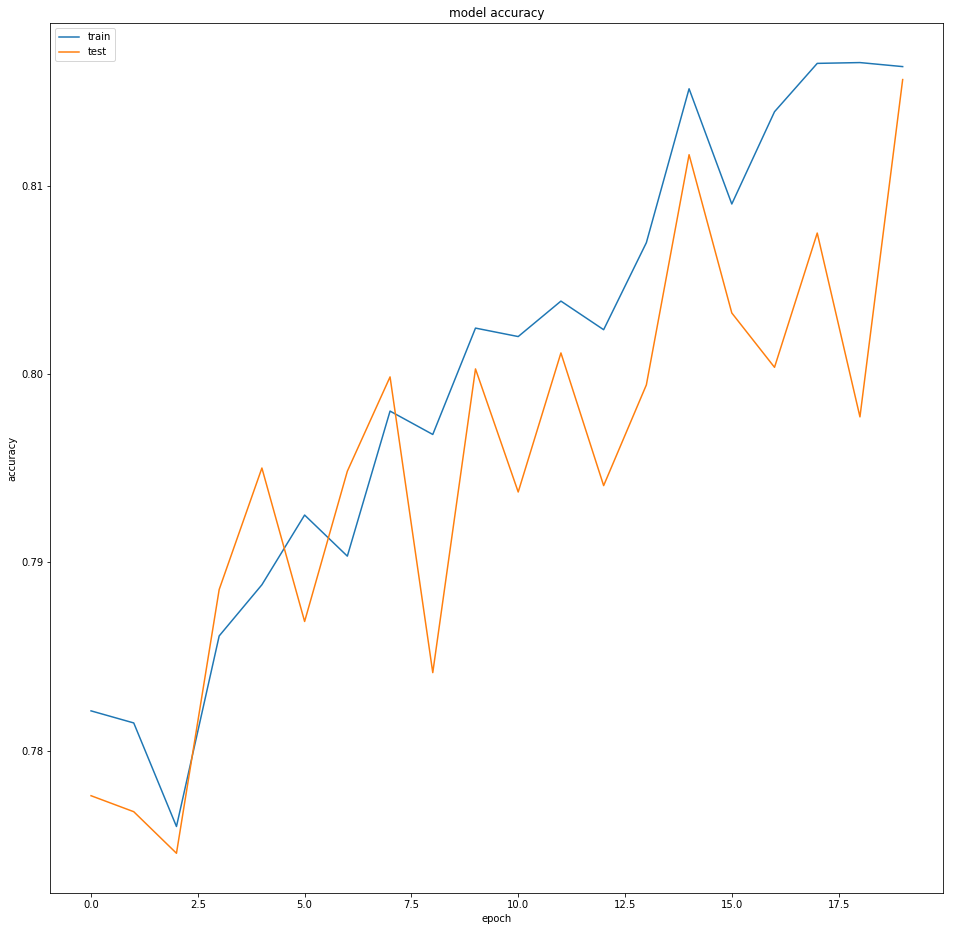

In [19]:
#summarize for accuracy
fig = plt.figure(figsize=(16,16))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

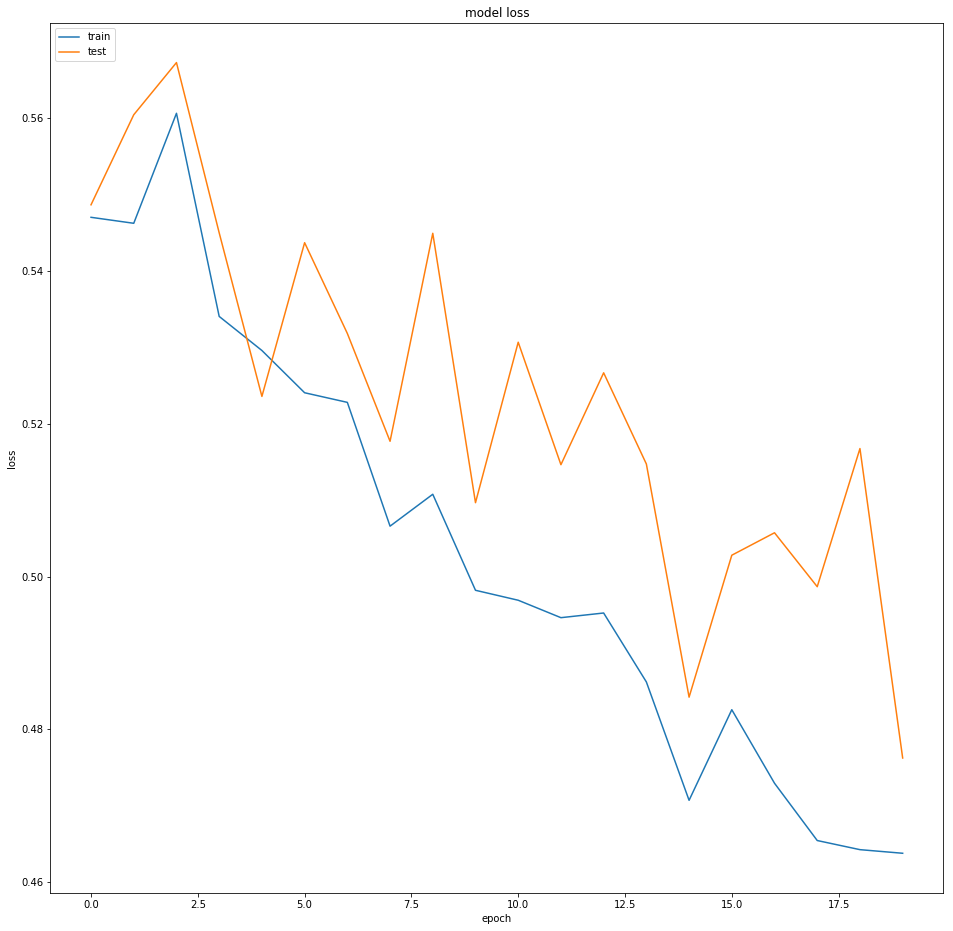

In [20]:
#summarize for loss
fig = plt.figure(figsize=(16,16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()